# Lab 6: RNN: Google Stocks prediction

## Import libraries

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math

from keras.callbacks import EarlyStopping
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Import the Google Stock price datasets

In [152]:
train_dataset = pd.read_csv('Google_Stock_Price_Train.csv')
train_dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [124]:
test_dataset = pd.read_csv('Google_Stock_Price_Test.csv')
test_dataset

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [125]:
train_data = train_dataset.iloc[:,1:2].values
test_data = test_dataset.iloc[:,1:2].values

In [126]:
train_data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [127]:
test_data

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

## Scaling

In [128]:
scaler = MinMaxScaler() #default od 0 do 1
train_data = scaler.fit_transform(train_data)

In [129]:
train_data

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [130]:
inputs = scaler.transform(test_data)

In [131]:
inputs

array([[0.92955205],
       [0.94731751],
       [0.94307612],
       [0.96015329],
       [0.98087655],
       [0.98359253],
       [0.97827219],
       [0.98225314],
       [0.98288563],
       [0.98214153],
       [0.979779  ],
       [0.97849542],
       [0.98182528],
       [0.98245777],
       [1.01045465],
       [1.02407173],
       [1.03930724],
       [1.03354044],
       [0.99624228],
       [0.9631297 ]])

In [132]:
train_data.size

1258

In [133]:
inputs.size

20

## Partitioning data into features/labels

In [134]:
x_train = train_data[:-1]
y_train = train_data[1:]

## Build the model

### Преобликување (reshaping) на влезните податоци за да се прилагодат на RNN слоевите во Keras

In [135]:
x_train = np.reshape(x_train, (1257, 1, 1))
inputs = np.reshape(inputs, (20, 1, 1))

### Дефинирање на моделот со рекурентна невронска мрежа

In [136]:
regressor = Sequential()
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
regressor.add(Dense(units = 1))

### Compile the model

In [137]:
regressor.compile(optimizer = 'adam', 
                  loss = 'mean_squared_error')

## Train the model

In [138]:
regressor.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
40/40 [==============================] - 0s 1ms/step - loss: 0.2029
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1440
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.1095
Epoch 4/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0919
Epoch 5/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0838
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0801
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0778
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0759
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0741
Epoch 10/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0723
Epoch 11/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0705
Epoch 12/100
40/40 [==============================] - 0s 1ms/step - loss: 0.0686
Epoch 13/100
40/40 [=================

## Make predictions

In [139]:
predicted = regressor.predict(inputs)
predicted = scaler.inverse_transform(predicted)

In [140]:
predicted[0]

array([772.31134], dtype=float32)

In [141]:
test_data[0]

array([778.81])

In [142]:
predicted.shape

(20, 1)

In [143]:
test_data.shape

(20, 1)

## Evaluate accuracy (MAE & RMSE)

In [144]:
rmse = math.sqrt(mean_squared_error(test_data, predicted))
print('Test Root Mean Squared Error:', rmse)
mae = mean_absolute_error(test_data, predicted)
print('Test Mean Absolute Error:', mae)

Test Root Mean Squared Error: 11.016933368942038
Test Mean Absolute Error: 10.758800292968743


## Visualizing Actual Google Stock Price vs Predicted Google Stock Price

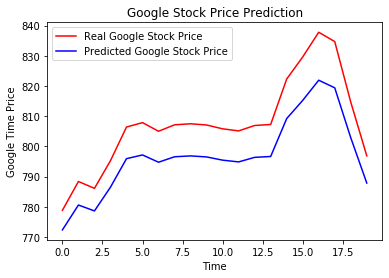

In [146]:
plt.figure()
plt.plot(test_data, color='red', label = 'Real Google Stock Price')
plt.plot(predicted, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()

## MAE plot

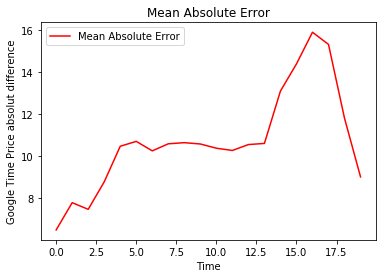

In [148]:
plt.figure()
plt.plot(np.abs(test_data - predicted), color='red', label = 'Mean Absolute Error')
plt.title('Mean Absolute Error')
plt.xlabel('Time')
plt.ylabel('Google Time Price absolut difference')
plt.legend()
plt.show()

# TODO